# Text Representation

## Basic Vectorization
The Twitter dataset (`tweets.csv`) was collected in February of 2015. Contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). The dataset can be found [here.](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

You should build an NLP pipeline to find all tweets that are related to `bad catering service`. In particular, you should do the following:
- Load the `tweets` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Train a text representation model, such as the [bag of n-gram vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) or [TF-IDF vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), on the content of the tweets.
- Apply the trained text representation model to vectorize the query (i.e., `bad catering service`) and all documents (i.e., tweets).
- Calculate the similarity of each vectorized tweet to the vectorized query using a similarity measure, such as [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html).
- Rank the tweets based on the similarity of their vectors to the query vector.
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Advanced Vectorization
You should build an NLP pipeline using a pretrained word embedding model. In particular, you should do the following:
- Load a pretrained word embedding model, such as word2vec or glove, using [gensim](https://radimrehurek.com/gensim/downloader.html).
- Examine the word vectors. For example, what is the most similar word to `Berlin`?
- Visualize a sample of word vectors using necessary libraries, such as [Sklearn's t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) and [Plotly](https://plotly.com/python/line-and-scatter/).

In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('/content/tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load tweets
df = pd.read_csv('/content/tweets.csv')
tweets = df['text'].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tweet_vectors = vectorizer.fit_transform(tweets)

# Query vectorization
query = "bad catering service"
query_vector = vectorizer.transform([query])

# Cosine similarity
similarities = cosine_similarity(query_vector, tweet_vectors).flatten()

# Rank and display top results
df['similarity'] = similarities
top_matches = df.sort_values(by='similarity', ascending=False)
print("\nTop 50 tweets related to 'bad catering service':\n")
print(top_matches[['text', 'similarity']].head(50))



Top 50 tweets related to 'bad catering service':

                                                    text  similarity
14570  @AmericanAir I really hope it departs. They sa...    0.307858
14486  @AmericanAir first the pilot, then the caterin...    0.243568
14156  @AmericanAir how hard is it to have catering r...    0.191104
11635  @USAirways bad weather shouldn't mean bad service    0.187078
11123  @USAirways your app is bad, and you should fee...    0.173993
10923  @USAirways has completely wasted my work day! ...    0.150807
1720   @united and I was denied an upgrade because of...    0.150223
12737    @AmericanAir SO BAD service in Miami, AirPort..    0.148351
13353       @AmericanAir you're almost as bad as @united    0.142554
10928  @USAirways that the flight was delayed &amp; c...    0.138942
11280  @USAirways : its just a very bad customer serv...    0.136203
14161  @AmericanAir I still am not on a flight. Ive b...    0.135013
8228   @JetBlue took forever for catering to get to 

In [7]:
pip install gensim scikit-learn matplotlib



Words similar to 'Berlin':

[('vienna', 0.8584439754486084), ('warsaw', 0.8421519994735718), ('munich', 0.8412714600563049), ('prague', 0.8232564330101013), ('germany', 0.7985421419143677), ('moscow', 0.7849310040473938), ('hamburg', 0.7831112742424011), ('bonn', 0.7699098587036133), ('copenhagen', 0.7623170018196106), ('cologne', 0.7509637475013733)]


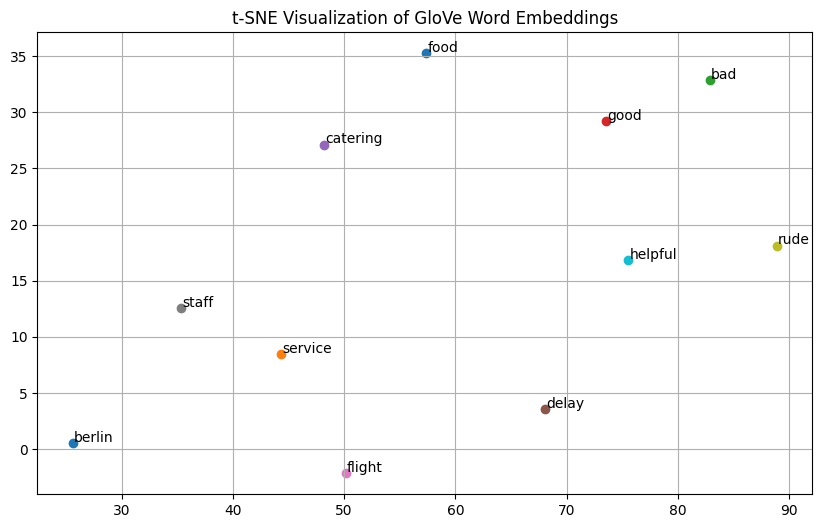

In [8]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load GloVe word vectors
model = api.load("glove-wiki-gigaword-50")

# Explore similarity
print("\nWords similar to 'Berlin':\n")
print(model.most_similar("berlin"))

# Sample words for visualization
words = ["food", "service", "bad", "good", "catering", "delay", "flight", "staff", "rude", "helpful", "berlin"]
vectors = np.array([model[word] for word in words])

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced = tsne.fit_transform(vectors)

# Plotting
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=word)
    plt.text(reduced[i, 0] + 0.1, reduced[i, 1] + 0.1, word)
plt.title("t-SNE Visualization of GloVe Word Embeddings")
plt.grid(True)
plt.show()
